In [2]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # 3D plotting
import time  # pause plot

In [3]:
def lorenz(x, y, z, s=10, r=28, b=2.667):
    """
    Given:
       x, y, z: a point of interest in three dimensional space
       s, r, b: parameters defining the lorenz attractor
    Returns:
       x_dot, y_dot, z_dot: values of the lorenz attractor's partial
           derivatives at the point x, y, z
    """
    x_dot = s*(y - x)
    y_dot = r*x - y - x*z
    z_dot = x*y - b*z
    return x_dot, y_dot, z_dot

In [4]:
# image details 
WIDTH, HEIGHT, DPI = 1000, 750, 100

In [5]:
# Lorenz paramters and initial conditions.
sigma, beta, rho = 10, 2.667, 28
u0, v0, w0 = 0, 1, 1.05

# Maximum time point and total number of time points.
tmax, n = 100, 10000

def lorenz(t, X, sigma, beta, rho):
    """The Lorenz equations."""
    u, v, w = X
    up = -sigma*(u - v)
    vp = rho*u - v - u*w
    wp = -beta*w + u*v
    return up, vp, wp

In [9]:
# Lorenz paramters and initial conditions.
sigma, beta, rho = 10, 2.667, 28
u0, v0, w0 = 0, 1, 1
# Integrate the Lorenz equations.
soln_1 = solve_ivp(lorenz, (0, tmax), (u0, v0, w0), args=(sigma, beta, rho),
                 dense_output=True)  # This is RK45

# Interpolate solution onto the time grid, t.
t = np.linspace(0, tmax, n)
x, y, z = soln_1.sol(t)

#repeat for slightly shifted initial values
u0_2, v0_2, w0_2 = 0, 1, 1.05
soln_2 = solve_ivp(lorenz, (0, tmax), (u0_2, v0_2, w0_2), args=(sigma, beta, rho),
                   dense_output=True)  # This is RK45
x_2, y_2, z_2 = soln_2.sol(t)
sol_np = soln_2.sol(t)


In [10]:
np.savetxt('sol_2_np.txt', np.append(t.reshape((1, n)), sol_np, axis=0))


In [11]:
with open('sol_2.csv', 'w', encoding='UTF8') as f:
    writer = csv.writer(f)

    # write the header
    writer.writerow(t)
    writer.writerow(x_2)
    writer.writerow(y_2)
    writer.writerow(z_2)

NameError: name 'csv' is not defined

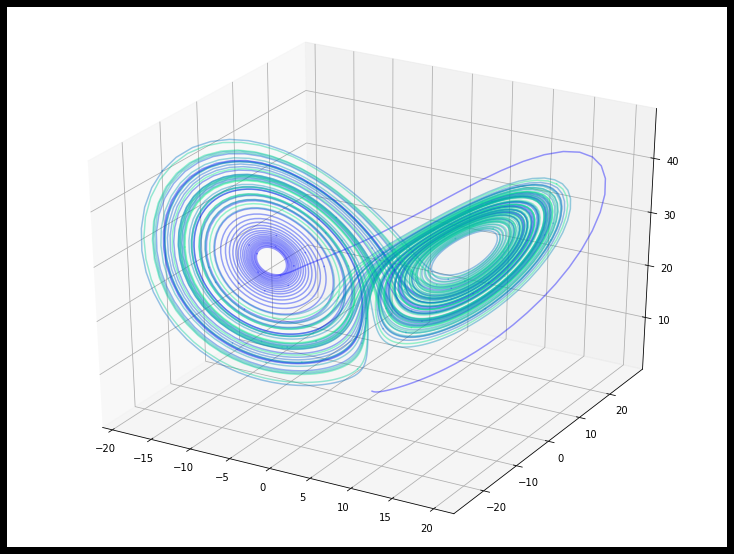

In [13]:
# Plot the Lorenz attractor using a Matplotlib 3D projection.
fig = plt.figure(facecolor='k', figsize=(WIDTH/DPI, HEIGHT/DPI))
ax = fig.gca(projection='3d')
#ax.set_facecolor('k')
fig.subplots_adjust(left=0, right=1, bottom=0, top=1)

# Make the line multi-coloured by plotting it in segments of length s which
# change in colour across the whole time series.
s = 100
cmap = plt.cm.winter # winter
cmap_2 = plt.cm.autumn  #autumn
for i in range(0, n-s, s):
    ax.plot(x[i:i+s+1], y[i:i+s+1], z[i:i+s+1], color=cmap(i/n), alpha=0.4)
    ax.set_title('')
    #ax.plot(x_2[i:i+s+1], y_2[i:i+s+1], z_2[i:i+s+1], color=cmap_2(i/n), alpha=0.4)
    #plt.pause(0.05)  # plot both curves incrementally
plt.show()

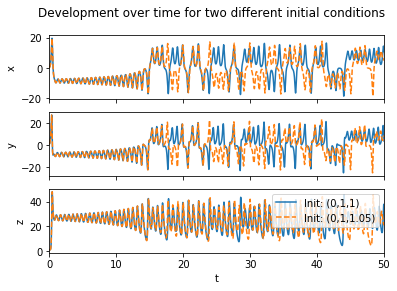

In [14]:
fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=True)#, figsize=(15, 15))
fig.suptitle('Development over time for two different initial conditions')
ax1.plot(t, x)
ax1.plot(t, x_2, '--')
ax1.set_ylabel('x')
ax2.plot(t, y)
ax2.plot(t, y_2, '--')
ax2.set_ylabel('y')
ax3.plot(t, z, label= 'Init: (0,1,1)')
ax3.plot(t, z_2, '--', label='Init: (0,1,1.05)')
ax3.set_ylabel('z')
ax3.set_xlabel('t')
ax3.set_xlim(0, 50)
ax3.legend(loc='center left', bbox_to_anchor=(1, 0.5))
